## Test code for converting morphology folders into HDF5 morphology containers

In [1]:
import datetime
import h5py
import json
import matplotlib.pyplot as plt
import morphio
import neurom as nm
import numpy as np
import obi_one as obi
import os
import shutil
import tqdm
from bluepysnap import Circuit
from importlib.metadata import version
from morph_tool import convert, morphio_diff

### Check existing files

In [2]:
# Test files
single_morph_path = "/Users/pokorny/JupyterLab/git/MorphIO/tests/data/h5/v1/simple.h5"
container_morph_path = "/Users/pokorny/JupyterLab/git/MorphIO/tests/data/h5/v1/merged.h5"

In [3]:
# Check morphologies
def get_h5_data(data):
    if isinstance(data, h5py.Group):
        return {_k: get_h5_data(data[_k]) for _k in data.keys()}
    else:
        return np.array(data)
with h5py.File(single_morph_path) as f:
    single_morph_dict = get_h5_data(f)
with h5py.File(container_morph_path) as f:
    container_morph_dict = get_h5_data(f)


In [4]:
single_morph_dict

{'metadata': {},
 'points': array([[ 1.e-03,  1.e-03,  0.e+00,  1.e-02],
        [-1.e-03,  1.e-03,  0.e+00,  1.e-02],
        [-1.e-03, -1.e-03,  0.e+00,  1.e-02],
        [ 1.e-03, -1.e-03,  0.e+00,  1.e-02],
        [ 0.e+00,  0.e+00,  0.e+00,  2.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  2.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  3.e+00],
        [-5.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 6.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 0.e+00,  0.e+00,  0.e+00,  2.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  2.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  4.e+00],
        [ 6.e+00, -4.e+00,  0.e+00,  4.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  4.e+00],
        [-5.e+00, -4.e+00,  0.e+00,  4.e+00]], dtype=float32),
 'structure': array([[ 0,  1, -1],
        [ 4,  3,  0],
        [ 6,  3,  1],
        [ 8,  3,  1],
        [10,  2,  0],
        [12,  2,  4],
        [14,  2,  4]], dtype=int32)}

In [5]:
container_morph_dict["simple"]

{'metadata': {},
 'points': array([[ 1.e-03,  1.e-03,  0.e+00,  1.e-02],
        [-1.e-03,  1.e-03,  0.e+00,  1.e-02],
        [-1.e-03, -1.e-03,  0.e+00,  1.e-02],
        [ 1.e-03, -1.e-03,  0.e+00,  1.e-02],
        [ 0.e+00,  0.e+00,  0.e+00,  2.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  2.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  3.e+00],
        [-5.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 6.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 0.e+00,  0.e+00,  0.e+00,  2.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  2.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  4.e+00],
        [ 6.e+00, -4.e+00,  0.e+00,  4.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  4.e+00],
        [-5.e+00, -4.e+00,  0.e+00,  4.e+00]], dtype=float32),
 'structure': array([[ 0,  1, -1],
        [ 4,  3,  0],
        [ 6,  3,  1],
        [ 8,  3,  1],
        [10,  2,  0],
        [12,  2,  4],
        [14,  2,  4]], dtype=int32)}

### Morphology conversion

__Single .asc morphology to .h5__

In [6]:
asc_file = "/Users/pokorny/JupyterLab/git/MorphIO/tests/data/simple.asc"  # Input
h5_file = os.path.join(".", os.path.splitext(os.path.split(asc_file)[1])[0] + ".h5")  # Output

In [7]:
convert(asc_file, h5_file)

In [8]:
with h5py.File(h5_file) as f:
    h5_dict = get_h5_data(f)

In [9]:
h5_dict

{'metadata': {},
 'points': array([[ 1.e-03,  1.e-03,  0.e+00,  1.e-02],
        [-1.e-03,  1.e-03,  0.e+00,  1.e-02],
        [-1.e-03, -1.e-03,  0.e+00,  1.e-02],
        [ 1.e-03, -1.e-03,  0.e+00,  1.e-02],
        [ 0.e+00,  0.e+00,  0.e+00,  2.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  2.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  3.e+00],
        [-5.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 6.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 0.e+00,  0.e+00,  0.e+00,  2.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  2.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  4.e+00],
        [ 6.e+00, -4.e+00,  0.e+00,  4.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  4.e+00],
        [-5.e+00, -4.e+00,  0.e+00,  4.e+00]], dtype=float32),
 'structure': array([[ 0,  1, -1],
        [ 4,  3,  0],
        [ 6,  3,  1],
        [ 8,  3,  1],
        [10,  2,  0],
        [12,  2,  4],
        [14,  2,  4]], dtype=int32)}

__Multiple .h5 morphologies from a folder into single .h5 container__

In [10]:
morph_folder = "./test_morphs"

In [12]:
h5_file = morph_folder + ".h5"
with h5py.File(h5_file, "w-") as f_out:
    for _file in sorted(os.listdir(morph_folder)):
        fname, fext = os.path.splitext(_file)
        if fext == ".h5":
            with h5py.File(os.path.join(morph_folder, _file)) as f_in:
                f_in.copy(f_in, f_out, name=fname)
                print(f"Added {fname}")

Added endoplasmic-reticulum
Added glia
Added mitochondria
Added simple-dendritric-spine
Added simple


In [13]:
with h5py.File(h5_file) as f:
    h5_dict = get_h5_data(f)

In [14]:
h5_dict.keys()

dict_keys(['endoplasmic-reticulum', 'glia', 'mitochondria', 'simple', 'simple-dendritric-spine'])

In [15]:
h5_dict["simple"]

{'metadata': {},
 'points': array([[ 1.e-03,  1.e-03,  0.e+00,  1.e-02],
        [-1.e-03,  1.e-03,  0.e+00,  1.e-02],
        [-1.e-03, -1.e-03,  0.e+00,  1.e-02],
        [ 1.e-03, -1.e-03,  0.e+00,  1.e-02],
        [ 0.e+00,  0.e+00,  0.e+00,  2.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  2.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  3.e+00],
        [-5.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 0.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 6.e+00,  5.e+00,  0.e+00,  3.e+00],
        [ 0.e+00,  0.e+00,  0.e+00,  2.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  2.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  4.e+00],
        [ 6.e+00, -4.e+00,  0.e+00,  4.e+00],
        [ 0.e+00, -4.e+00,  0.e+00,  4.e+00],
        [-5.e+00, -4.e+00,  0.e+00,  4.e+00]], dtype=float32),
 'structure': array([[ 0,  1, -1],
        [ 4,  3,  0],
        [ 6,  3,  1],
        [ 8,  3,  1],
        [10,  2,  0],
        [12,  2,  4],
        [14,  2,  4]], dtype=int32)}

In [16]:
with h5py.File(h5_file) as f:
    morph_list = list(f.keys())
coll_container = morphio.Collection(h5_file)
coll_folder = morphio.Collection(morph_folder)
for _mname in morph_list:
    morph_c = coll_container.load(_mname)
    morph_f = coll_folder.load(_mname)
    mdiff = morphio_diff.diff(morph_c, morph_f)
    if mdiff:
        print(f"ERROR: Morphology '{_mname}' differs!\n{mdiff.info}")
    else:
        print(f"Morphology '{_mname}' does not differ!")
coll_container.close()
coll_folder.close()

Morphology 'endoplasmic-reticulum' does not differ!
Morphology 'glia' does not differ!
Morphology 'mitochondria' does not differ!
Morphology 'simple' does not differ!
Morphology 'simple-dendritric-spine' does not differ!



HDF5 GROUP:0:warning

./test_morphs/simple-dendritric-spine.h5:0:warning


__Adding morphology container to circuit__

In [223]:
circuit_config = "/Users/pokorny/Data/ToyCircuit-S1-6k-Test/circuit_config.json"
c = Circuit(circuit_config)
nodes = c.nodes["All"]
morph_names = np.unique(nodes.get(properties="morphology"))
print(f"INFO: Loaded circuit with {nodes.size} neurons and {len(morph_names)} unique morphologies")

INFO: Loaded circuit with 5924 neurons and 5474 unique morphologies


_Step 1: Convert .asc folder to .h5, if not existing_

In [224]:
asc_folder = nodes.morph.get_morphology_dir("asc")  # Input folder
assert len(os.listdir(asc_folder)) > 0, "ERROR: .asc morphology folder is empty!"
h5_folder = os.path.join(os.path.split(asc_folder)[0], "_h5_morphologies_tmp_")
os.makedirs(h5_folder, exist_ok=False)

FileExistsError: [Errno 17] File exists: '/Users/pokorny/Data/ToyCircuit-S1-6k-Test/components/morphologies/_h5_morphologies_tmp_'

In [109]:
for _m in tqdm.tqdm(morph_names):
    convert(os.path.join(asc_folder, _m + ".asc"), os.path.join(h5_folder, _m + ".h5"))

100%|██████████████████████████████████████████████████████████████████████████████████████████| 5474/5474 [00:38<00:00, 143.91it/s]


OR: Use batch conversion in command line:
~~~
morph-tool convert folder -ext h5 ./asc_input_folder ./h5_output_folder
~~~

_Step 2: Convert .h5 folder to container_

In [243]:
container_file = "container.h5"
h5_container = os.path.join(os.path.split(asc_folder)[0], container_file)
h5_folder = os.path.join(os.path.split(asc_folder)[0], "_h5_morphologies_tmp_")
# assert not os.path.exists(h5_container), f"ERROR: Container file '{h5_container}' already exists!"
with h5py.File(h5_container, "a") as f_container:
    skip_counter = 0
    for _m in tqdm.tqdm(morph_names):
        with h5py.File(os.path.join(h5_folder, _m + ".h5")) as f_h5:
            if _m in f_container:
                skip_counter += 1
            else:
                f_h5.copy(f_h5, f_container, name=_m)
print(f"INFO: {skip_counter} of {len(morph_names)} morphologies already existed")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5474/5474 [00:00<00:00, 21585.71it/s]

INFO: 5474 of 5474 morphologies already existed


_Step 3: Delete temporary .h5 folder (optional)_

In [119]:
# shutil.rmtree(h5_folder)

_Step 4: Update circuit config_

In [15]:
cname, cext = os.path.splitext(circuit_config)
shutil.copy(circuit_config, cname + "__BAK__" + cext)  # Save original config file

with open(circuit_config, "r") as f:
    cfg_dict = json.load(f)

for _ndict in cfg_dict["networks"]["nodes"]:
    if nodes.name in _ndict["populations"]:
        _pop = _ndict["populations"][nodes.name]
        _pop["alternate_morphologies"]["h5v1"] = os.path.join(os.path.split(_pop["alternate_morphologies"]["neurolucida-asc"])[0], container_file)
        break

with open(circuit_config, "w") as f:
    json.dump(cfg_dict, f, indent=2)


_Test: Loading morphologies from container using SNAP_ __>>> REQUIRES SNAP v3.0.2 or higher (not yet on PyPI)!!__

In [19]:
def load_morphology(nodes, nid, extension='asc'):
    def _sec_points(sec, soma_pos):
        """Connect all root sections to the soma."""
        if sec.is_root:
            return np.vstack([soma_pos, sec.points])
        else:
            return sec.points
    get_tgt_morph = lambda node_id: nodes.morph.get(node_id, transform=True, extension=extension) # Access function (incl. transformation!), using ASCII format
    nrn_morph = get_tgt_morph(nid)  # Target morphology
    soma_pos = nrn_morph.soma.center
    dd_types = list(filter(lambda tp: "dendrite" in tp.name, nm.NEURITE_TYPES))  # Select dendrite types
    dd_sel = np.isin(nrn_morph.section_types, dd_types)
    dd_points = [_sec_points(_sec, soma_pos) for _sel, _sec in zip(dd_sel, nrn_morph.sections) if _sel]  # Dendrite points
    ax_types = list(filter(lambda tp: "axon" in tp.name, nm.NEURITE_TYPES))  # Select dendrite types
    ax_sel = np.isin(nrn_morph.section_types, ax_types)
    ax_points = [_sec_points(_sec, soma_pos) for _sel, _sec in zip(ax_sel, nrn_morph.sections) if _sel]  # Axon points
    return soma_pos, dd_points, ax_points

def plot_morph(soma_pos, dd_points, ax_points, soma_color="k", dd_style={"fmt": "k-"}, ax_style=None, label=None):
    if soma_color is not None:
        plt.plot(*soma_pos, "o", color=soma_color, alpha=1.0, markeredgecolor="none", label=label)
    if dd_style is not None:
        dd_style = dd_style.copy()
        dd_fmt = dd_style.pop("fmt", "")
        for _i, _p in enumerate(dd_points):
            plt.plot(_p[:, 0], _p[:, 1], _p[:, 2], dd_fmt, **dd_style)
    if ax_style is not None:
        ax_style = ax_style.copy()
        ax_fmt = ax_style.pop("fmt", "")
        for _i, _p in enumerate(ax_points):
            plt.plot(_p[:, 0], _p[:, 1], _p[:, 2], ax_fmt, **ax_style)

In [20]:
# Re-load circuit
c = Circuit(circuit_config)
nodes = c.nodes["All"]
morph_names = np.unique(nodes.get(properties="morphology"))
print(f"INFO: Loaded circuit with {nodes.size} neurons and {len(morph_names)} unique morphologies")

INFO: Loaded circuit with 5924 neurons and 5474 unique morphologies


/Users/pokorny/Data/ToyCircuit-S1-6k-Test/components/morphologies/container.h5


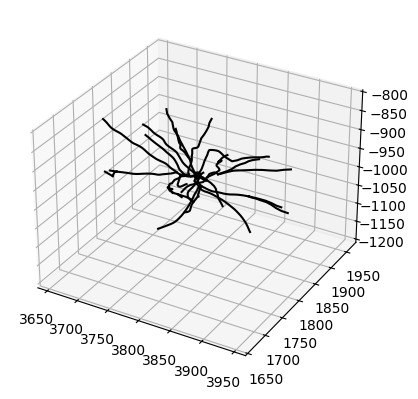

In [34]:
plt.figure()
plt.gcf().add_subplot(projection="3d")
morph = load_morphology(nodes, 0, extension="h5")  # h5 ... From container
print(nodes.morph._get_morphology_base("h5"))  # Verify use of container
plot_morph(*morph)
plt.show()

__Update hoc files based on templates__

In [4]:
hoc_tmpl_old = "/Users/pokorny/JupyterLab/git/BluePyEModel/bluepyemodel/export_emodel/templates/cell_template_neurodamus.jinja2"
hoc_tmpl_new = "/Users/pokorny/JupyterLab/git/BluePyEModel/bluepyemodel/export_emodel/templates/cell_template_neurodamus_sbo.jinja2"

In [44]:
# Find difference between templates
with open(hoc_tmpl_old, "r") as f:
    tmpl_old = f.read()
with open(hoc_tmpl_new, "r") as f:
    tmpl_new = f.read()

In [103]:
def find_proc(proc_name, hoc_code):
    start_idx = hoc_code.find(f"proc {proc_name}")
    assert start_idx >= 0, f"ERROR: '{proc_name}' not found!"
    counter = 0
    has_first = False
    for _idx in range(start_idx, len(hoc_code)):
        if hoc_code[_idx] == "{":
            counter += 1
            has_first = True
        elif hoc_code[_idx] == "}":
            counter -= 1
        if has_first and counter == 0:
            end_idx = _idx
            break
    return start_idx, end_idx, hoc_code[start_idx : end_idx + 1]

def find_header(hoc_code):
    start_idx = hoc_code.find("/*")  # First occurrence
    assert start_idx == 0, "ERROR: Header not found!"
    end_idx = hoc_code.find("*/")  # First occurrence
    assert end_idx > 0, "ERROR: Header not found!"
    return start_idx, end_idx, hoc_code[start_idx : end_idx + 2]

In [81]:
proc_name = "load_morphology"
_, _, code_old = find_proc(proc_name, tmpl_old)
_, _, code_new = find_proc(proc_name, tmpl_new)

In [66]:
# print(code_old)

In [67]:
# print(code_new)

In [137]:
# Replace code in hoc file
hoc_file = "./test_hoc/bAC_L6BTC.hoc"
hoc_output_folder = "./test_hoc_new"
if not os.path.exists(hoc_output_folder):
    os.makedirs(hoc_output_folder)
with open(hoc_file, "r") as f:
    hoc = f.read()
assert hoc.find(code_old) >= 0, "ERROR: Old HOC code to replace not found!"
hoc_new = hoc.replace(code_old, code_new)
_, _, header = find_header(hoc)
header_new = header.replace("*/", f"Updated '{proc_name}' based on '{os.path.split(hoc_tmpl_new)[1]}' by {obi.__name__}({version(obi.__name__)}) at {datetime.datetime.now()}\n*/")
hoc_new = hoc_new.replace(header, header_new)
with open(os.path.join(hoc_output_folder, os.path.split(hoc_file)[1]), "w") as f:
    f.write(hoc_new)